<a href="https://colab.research.google.com/github/mariopetkoski/dsproject/blob/main/vnp_seminarska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Да се изберат пет различни временски серии кои имаат во себе податоци за
изминатите 4 години (на пример податоци од берза, криптовалути, цена на нафта, цена на злато, цена на земен гас). Потоа, да се проучат податоците со користење на tsfresh и истите да се објаснат. За крај, да се направат различни интерактивни визуелизации на сите податоци кои ќе овозможат лесна компаративна анализа (да се направи истото со најмалку две библиотеки и да се објасни која е подобра).

Податоците ги превземав од : https://www.nasdaq.com/market-activity/stocks

In [ ]:
import pandas as pd

In [ ]:
apple = pd.read_csv("./content/apple.csv")
meta = pd.read_csv("./content/meta.csv")
microsoft = pd.read_csv("./content/microsoft.csv")
nvidia = pd.read_csv("./content/nvidia.csv")
tesla = pd.read_csv("./content/tesla.csv")

In [ ]:
apple

,Date,Close/Last,Volume,Open,High,Low
0,07/07/2023,$190.68,46815000,$191.41,$192.67,$190.24
1,07/06/2023,$191.81,45156010,$189.84,$192.02,$189.20
2,07/05/2023,$191.33,46920260,$191.565,$192.98,$190.62
3,07/03/2023,$192.46,31346600,$193.78,$193.88,$191.76
4,06/30/2023,$193.97,85213220,$191.63,$194.48,$191.26
...,...,...,...,...,...,...
1253,07/13/2018,$47.8325,50027320,$47.77,$47.96,$47.725
1254,07/12/2018,$47.7575,72000720,$47.3825,$47.8525,$47.3275
1255,07/11/2018,$46.97,75105560,$47.125,$47.445,$46.9025
1256,07/10/2018,$47.5875,63205480,$47.6775,$47.82,$47.545


In [ ]:
stocks_list = [apple, meta, microsoft, nvidia, tesla]

In [ ]:
transformed_list = []
names = ['apple', 'meta', 'microsoft', 'nvidia', 'tesla']

for i, name in zip(stocks_list, names):
    column_mapping = {col: name + "_" + col.lower() for col in ['Open', 'High', 'Low', 'Close/Last', 'Volume']}
    i.rename(columns=column_mapping, inplace=True)
    transformed_list.append(i)


In [ ]:
df = transformed_list[0]
for i in range(1, len(transformed_list)):
    df = df.merge(transformed_list[i], on='Date', how='inner')

In [ ]:
df.head()

,Date,apple_close/last,apple_volume,apple_open,apple_high,apple_low,meta_close/last,meta_volume,meta_open,meta_high,...,nvidia_close/last,nvidia_volume,nvidia_open,nvidia_high,nvidia_low,tesla_close/last,tesla_volume,tesla_open,tesla_high,tesla_low
0,07/07/2023,$190.68,46815000,$191.41,$192.67,$190.24,$290.53,25585980,$292.18,$296.20,...,$425.03,35588150,$423.22,$432.14,$421.80,$274.43,113879200,$278.43,$280.78,$273.77
1,07/06/2023,$191.81,45156010,$189.84,$192.02,$189.20,$291.99,47733830,$295.885,$298.12,...,$421.03,30413880,$418.44,$421.79,$413.46,$276.54,120707400,$278.09,$279.97,$272.88
2,07/05/2023,$191.33,46920260,$191.565,$192.98,$190.62,$294.37,33865460,$287.65,$298.12,...,$423.17,32361760,$421.35,$431.77,$420.85,$282.48,131530900,$278.82,$283.85,$277.60
3,07/03/2023,$192.46,31346600,$193.78,$193.88,$191.76,$286.02,8608555,$286.70,$289.40,...,$424.13,19775410,$425.17,$428.98,$422.02,$279.82,118999000,$276.49,$284.25,$275.11
4,06/30/2023,$193.97,85213220,$191.63,$194.48,$191.26,$286.98,19694870,$284.76,$289.05,...,$423.02,50114780,$416.80,$425.50,$415.01,$261.77,112620800,$260.60,$264.45,$259.89


In [ ]:
df['id'] = pd.Index(range(1, len(df)+1))

In [ ]:
df.dtypes

Date                    object
apple_close/last        object
apple_volume             int64
apple_open              object
apple_high              object
apple_low               object
meta_close/last         object
meta_volume              int64
meta_open               object
meta_high               object
meta_low                object
microsoft_close/last    object
microsoft_volume         int64
microsoft_open          object
microsoft_high          object
microsoft_low           object
nvidia_close/last       object
nvidia_volume            int64
nvidia_open             object
nvidia_high             object
nvidia_low              object
tesla_close/last        object
tesla_volume             int64
tesla_open              object
tesla_high              object
tesla_low               object
id                       int64
dtype: object

In [ ]:
df.head()


,Date,apple_close/last,apple_volume,apple_open,apple_high,apple_low,meta_close/last,meta_volume,meta_open,meta_high,...,nvidia_volume,nvidia_open,nvidia_high,nvidia_low,tesla_close/last,tesla_volume,tesla_open,tesla_high,tesla_low,id
0,07/07/2023,$190.68,46815000,$191.41,$192.67,$190.24,$290.53,25585980,$292.18,$296.20,...,35588150,$423.22,$432.14,$421.80,$274.43,113879200,$278.43,$280.78,$273.77,1
1,07/06/2023,$191.81,45156010,$189.84,$192.02,$189.20,$291.99,47733830,$295.885,$298.12,...,30413880,$418.44,$421.79,$413.46,$276.54,120707400,$278.09,$279.97,$272.88,2
2,07/05/2023,$191.33,46920260,$191.565,$192.98,$190.62,$294.37,33865460,$287.65,$298.12,...,32361760,$421.35,$431.77,$420.85,$282.48,131530900,$278.82,$283.85,$277.60,3
3,07/03/2023,$192.46,31346600,$193.78,$193.88,$191.76,$286.02,8608555,$286.70,$289.40,...,19775410,$425.17,$428.98,$422.02,$279.82,118999000,$276.49,$284.25,$275.11,4
4,06/30/2023,$193.97,85213220,$191.63,$194.48,$191.26,$286.98,19694870,$284.76,$289.05,...,50114780,$416.80,$425.50,$415.01,$261.77,112620800,$260.60,$264.45,$259.89,5


In [ ]:
do_not_to_convert = ["Date", "apple_volume", "meta_volume", "microsoft_volume", "tesla_volume", "nvidia_volume", "id"]
for col in df.columns:
    if col not in do_not_to_convert:
        df[col] = df[col].str.replace(r'\$', '').astype(float)

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

<ipython-input-36-ea99e65be6fc>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
df

,Date,apple_close/last,apple_volume,apple_open,apple_high,apple_low,meta_close/last,meta_volume,meta_open,meta_high,...,nvidia_volume,nvidia_open,nvidia_high,nvidia_low,tesla_close/last,tesla_volume,tesla_open,tesla_high,tesla_low,id
0,2023-07-07,190.6800,46815000,191.4100,192.6700,190.2400,290.53,25585980,292.180,296.20,...,35588150,423.2200,432.1400,421.8000,274.430,113879200,278.4300,280.7800,273.7700,1
1,2023-07-06,191.8100,45156010,189.8400,192.0200,189.2000,291.99,47733830,295.885,298.12,...,30413880,418.4400,421.7900,413.4600,276.540,120707400,278.0900,279.9700,272.8800,2
2,2023-07-05,191.3300,46920260,191.5650,192.9800,190.6200,294.37,33865460,287.650,298.12,...,32361760,421.3500,431.7700,420.8500,282.480,131530900,278.8200,283.8500,277.6000,3
3,2023-07-03,192.4600,31346600,193.7800,193.8800,191.7600,286.02,8608555,286.700,289.40,...,19775410,425.1700,428.9800,422.0200,279.820,118999000,276.4900,284.2500,275.1100,4
4,2023-06-30,193.9700,85213220,191.6300,194.4800,191.2600,286.98,19694870,284.760,289.05,...,50114780,416.8000,425.5000,415.0100,261.770,112620800,260.6000,264.4500,259.8900,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2018-07-13,47.8325,50027320,47.7700,47.9600,47.7250,207.32,11421420,207.810,208.43,...,24684572,62.9950,62.9950,61.9050,21.258,88001596,21.0387,21.3057,20.6167,1254
1254,2018-07-12,47.7575,72000720,47.3825,47.8525,47.3275,206.92,15439760,203.430,207.08,...,34510284,62.3400,63.2925,62.2400,21.114,85677722,21.4287,21.5487,20.8513,1255
1255,2018-07-11,46.9700,75105560,47.1250,47.4450,46.9025,202.54,12729340,202.220,204.50,...,36653236,62.3750,62.7250,61.7750,21.264,73178888,21.0533,21.4627,21.0047,1256
1256,2018-07-10,47.5875,63205480,47.6775,47.8200,47.5450,203.54,12868530,204.500,204.91,...,35704832,62.4375,63.5350,62.0300,21.498,141563284,21.6373,21.8452,21.2800,1257


In [ ]:
df.dtypes

Date                    datetime64[ns]
apple_close/last               float64
apple_volume                     int64
apple_open                     float64
apple_high                     float64
apple_low                      float64
meta_close/last                float64
meta_volume                      int64
meta_open                      float64
meta_high                      float64
meta_low                       float64
microsoft_close/last           float64
microsoft_volume                 int64
microsoft_open                 float64
microsoft_high                 float64
microsoft_low                  float64
nvidia_close/last              float64
nvidia_volume                    int64
nvidia_open                    float64
nvidia_high                    float64
nvidia_low                     float64
tesla_close/last               float64
tesla_volume                     int64
tesla_open                     float64
tesla_high                     float64
tesla_low                

<ipython-input-39-4aa3d69048b2>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



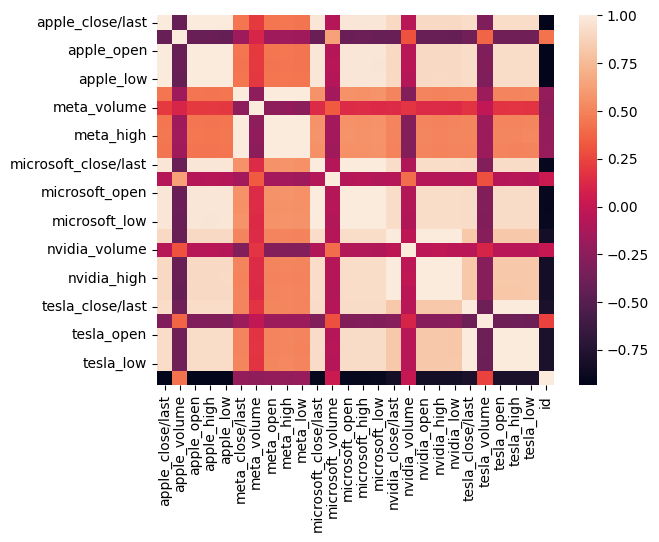

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp

dataplot=sb.heatmap(df.corr())

mp.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['apple_open'],
                high=df['apple_high'],
                low=df['apple_low'],
                close=df['apple_close/last'])])

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['microsoft_open'],
                high=df['microsoft_high'],
                low=df['microsoft_low'],
                close=df['microsoft_close/last'])])

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['meta_open'],
                high=df['meta_high'],
                low=df['meta_low'],
                close=df['meta_close/last'])])

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['tesla_open'],
                high=df['tesla_high'],
                low=df['tesla_low'],
                close=df['tesla_close/last'])])

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['nvidia_open'],
                high=df['nvidia_high'],
                low=df['nvidia_low'],
                close=df['nvidia_close/last'])])

fig.show()

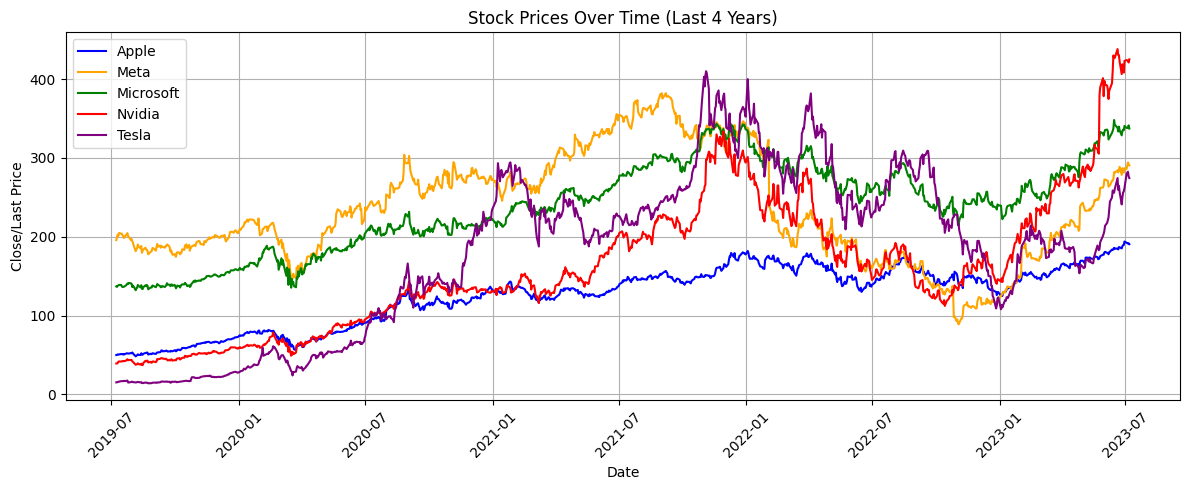

In [ ]:
import matplotlib.pyplot as plt

# Set a color palette for the stocks
color_palette = ['blue', 'orange', 'green', 'red', 'purple']

# Filter data for the last 4 years
four_years_ago = pd.to_datetime('2023-07-07') - pd.DateOffset(years=4)
filtered_df = df[df['Date'] >= four_years_ago]

# Line Chart
plt.figure(figsize=(12, 5))
stocks = ['apple', 'meta', 'microsoft', 'nvidia', 'tesla']  # Add other stock names as needed

for i, stock in enumerate(stocks):
    plt.plot(filtered_df['Date'], filtered_df[f'{stock}_close/last'], label=stock.capitalize(), color=color_palette[i])

plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('Stock Prices Over Time (Last 4 Years)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


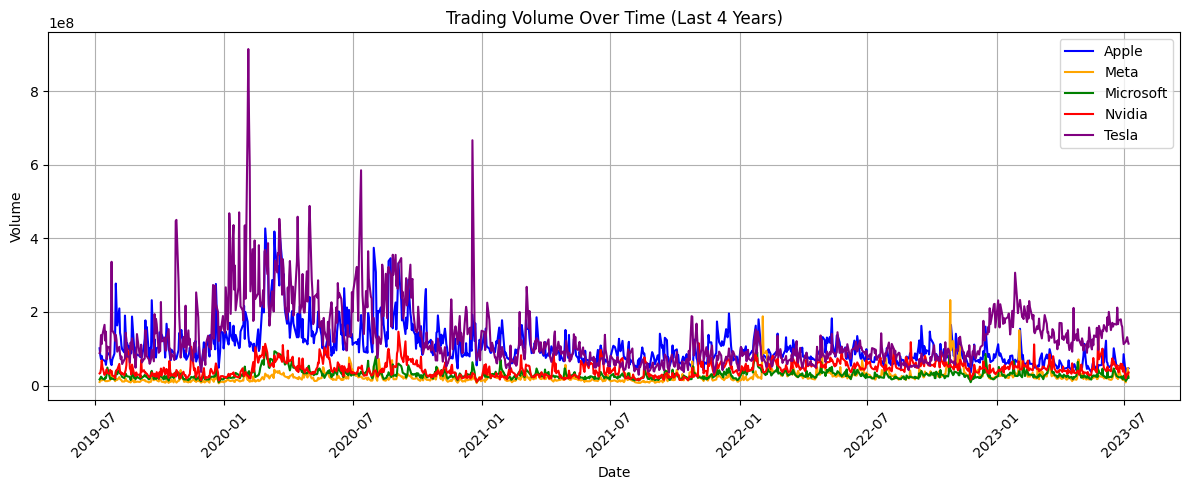

In [ ]:
import matplotlib.pyplot as plt


color_palette = ['blue', 'orange', 'green', 'red', 'purple']


four_years_ago = pd.to_datetime('2023-07-07') - pd.DateOffset(years=4)
filtered_df = df[df['Date'] >= four_years_ago]


plt.figure(figsize=(12, 5))
stocks = ['apple', 'meta', 'microsoft', 'nvidia', 'tesla']

for i, stock in enumerate(stocks):
    plt.plot(filtered_df['Date'], filtered_df[f'{stock}_volume'], label=stock.capitalize(), color=color_palette[i])

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time (Last 4 Years)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

four_years_ago = pd.to_datetime('2023-07-07') - pd.DateOffset(years=4)
filtered_df = df[df['Date'] >= four_years_ago]

fig = px.line(filtered_df, x='Date', y=[f'{stock}_close/last' for stock in stocks],
              title='Stock Prices Over Time (Last 4 Years)',
              labels={'variable': 'Stock', 'value': 'Close/Last Price'},
              color_discrete_sequence=color_palette)

fig.update_xaxes(tickangle=45)
fig.show()


In [ ]:
import plotly.express as px

four_years_ago = pd.to_datetime('2023-07-07') - pd.DateOffset(years=4)
filtered_df = df[df['Date'] >= four_years_ago]

fig = px.line(filtered_df, x='Date', y=[f'{stock}_volume' for stock in stocks],
              title='Trading Volume Over Time (Last 4 Years)',
              labels={'variable': 'Stock', 'value': 'Volume'},
              color_discrete_sequence=color_palette)

fig.update_xaxes(tickangle=45)
fig.show()


In [ ]:
from tsfresh import extract_features

settings = {'id': 'id', 'time': 'Date'}

# Extract features using Tsfresh
extracted_features = extract_features(df, column_id=settings['id'], column_sort=settings['time'])

# Print the extracted features
print(extracted_features)







Feature Extraction: 100%|██████████| 31450/31450 [18:57<00:00, 27.66it/s]


      apple_close/last__variance_larger_than_standard_deviation  \
1                                                   0.0           
2                                                   0.0           
3                                                   0.0           
4                                                   0.0           
5                                                   0.0           
...                                                 ...           
1254                                                0.0           
1255                                                0.0           
1256                                                0.0           
1257                                                0.0           
1258                                                0.0           

      apple_close/last__has_duplicate_max  \
1                                     0.0   
2                                     0.0   
3                                     0.0   
4              

In [ ]:

df_features = extracted_features.dropna(axis=1)

,apple_close/last__variance_larger_than_standard_deviation,apple_close/last__has_duplicate_max,apple_close/last__has_duplicate_min,apple_close/last__has_duplicate,apple_close/last__sum_values,apple_close/last__abs_energy,apple_close/last__median,apple_close/last__mean,apple_close/last__length,apple_close/last__standard_deviation,...,tesla_low__ratio_beyond_r_sigma__r_6,tesla_low__ratio_beyond_r_sigma__r_7,tesla_low__ratio_beyond_r_sigma__r_10,tesla_low__count_above__t_0,tesla_low__count_below__t_0,tesla_low__lempel_ziv_complexity__bins_2,tesla_low__lempel_ziv_complexity__bins_3,tesla_low__lempel_ziv_complexity__bins_5,tesla_low__lempel_ziv_complexity__bins_10,tesla_low__lempel_ziv_complexity__bins_100
1,0.0,0.0,0.0,0.0,190.6800,36358.862400,190.6800,190.6800,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,191.8100,36791.076100,191.8100,191.8100,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,191.3300,36607.168900,191.3300,191.3300,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,192.4600,37040.851600,192.4600,192.4600,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,193.9700,37624.360900,193.9700,193.9700,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.0,0.0,0.0,0.0,47.8325,2287.948056,47.8325,47.8325,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1255,0.0,0.0,0.0,0.0,47.7575,2280.778806,47.7575,47.7575,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1256,0.0,0.0,0.0,0.0,46.9700,2206.180900,46.9700,46.9700,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1257,0.0,0.0,0.0,0.0,47.5875,2264.570156,47.5875,47.5875,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
